# 

In [1]:
import os
import urllib
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f80b95db550>)

# K-Means:

## Clustering for Image Segmentation  

In [4]:
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))
image.shape

(533, 800, 3)

In [5]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

In [6]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

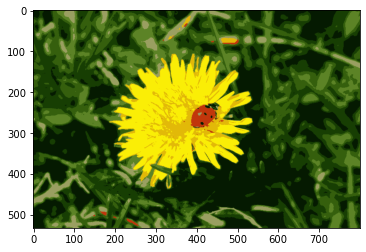

In [7]:
plt.imshow(segmented_img);

## Clustering for PreProcessing 

In [8]:
from sklearn.datasets import load_digits

In [9]:
X_digits, y_digits = load_digits(return_X_y=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [14]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [15]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [16]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

............ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=53 ...........................................
[CV] ............................ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   0.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   0.5s
[CV] kmeans__n_clusters=54 ...........................................
[CV] ............................ kmeans__n_clusters=54, total=   0.5s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ............................ kmeans__n_clusters=55, total=   0.5s
[CV] kmeans__n_clusters=55 ...........................................
[CV] ......................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [18]:
grid_clf.best_params_

{'kmeans__n_clusters': 32}

In [19]:
grid_clf.score(X_test, y_test)

0.9666666666666667

## Clustering for Semi-Supervised Learning

In [20]:
n_labelled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labelled], y_train[:n_labelled])

LogisticRegression()

In [21]:
log_reg.score(X_test, y_test)

0.8244444444444444

In [22]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)

In [23]:
X_digits_dist[:1]

array([[38.90438305, 40.82614483, 46.3890178 , 46.86869484, 40.246088  ,
        24.34758647, 55.17042283, 40.88199604, 43.41085194, 46.30413049,
        54.10547425, 28.57554256, 46.3309944 , 37.91742595, 52.68015736,
        27.92317503, 32.8918683 , 47.61577886, 40.50390508, 45.54125064,
        48.71535632, 34.34092776, 50.04456902, 51.72059746, 30.17976444,
        23.14688154, 42.09452305, 46.65487202, 56.15159896, 50.94160636,
        33.3341061 , 34.38910906, 46.19371614, 53.68542115, 39.06716265,
        29.44741956, 50.22003524, 32.58241175, 39.40601182, 42.90449694,
        24.67511117, 43.90584754, 48.40735073, 42.36317304, 52.25348473,
        46.8646722 , 54.2287777 , 53.21653878, 44.45644767, 56.72800302]])

In [24]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print(representative_digit_idx.shape)
X_representative_digits = X_train[representative_digit_idx]

(50,)


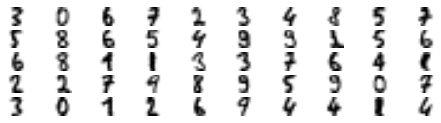

In [25]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [29]:
y_representative_digits = np.array([
    3, 0, 6, 7, 2, 3, 4, 8, 5, 7,
    5, 8, 6, 5, 4, 9, 9, 1, 5, 6,
    6, 8, 1, 1, 3, 3, 7, 6, 4, 1,
    2, 2, 7, 9, 8, 9, 5, 9, 0, 7,
    3, 0, 1, 2, 6, 9, 4, 4, 1, 4])

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

### Label Propagation

In [34]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9222222222222223

In [55]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9133333333333333

In [57]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9827586206896551

# DBScan

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [59]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [62]:
dbscan.labels_[:20]

array([-1,  0,  2, -1,  1,  2,  3,  4,  4,  2,  2,  4,  5,  1,  2,  2,  6,
        9, -1,  2])

In [63]:
len(dbscan.core_sample_indices_)

805

In [65]:
dbscan.core_sample_indices_[:20]

array([ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21,
       22, 23, 24])

In [66]:
dbscan.components_

array([[ 1.96078418,  0.16746192],
       [-0.70547211,  0.67113492],
       [ 1.15482807, -0.51655764],
       ...,
       [ 0.418696  , -0.32552067],
       [ 0.37364248, -0.31992401],
       [-0.04155421,  0.97859659]])

In [74]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [75]:
# Copied the below code directly from Hands-on ML 2 by Aurelien Geron

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

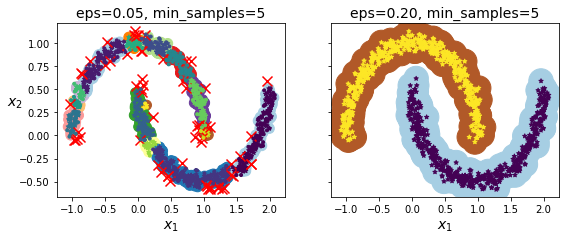

In [77]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [79]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [80]:
knn.predict(X_new)

array([1, 0, 1, 0])

In [81]:
knn.predict_proba(X_new)

array([[0.22, 0.78],
       [1.  , 0.  ],
       [0.18, 0.82],
       [1.  , 0.  ]])

In [87]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

# Gaussian Mixtures

In [4]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [5]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

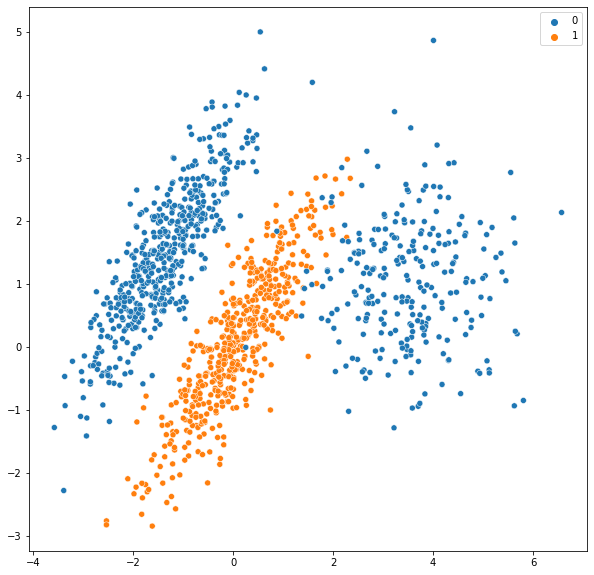

In [6]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [7]:
from sklearn.mixture import GaussianMixture

In [8]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [9]:
gm.weights_

array([0.40008962, 0.2093669 , 0.39054348])

In [10]:
gm.means_

array([[-1.40754214,  1.42716873],
       [ 3.40196611,  1.05838748],
       [ 0.05224874,  0.07631976]])

In [11]:
gm.covariances_

array([[[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]]])

In [12]:
gm.converged_

True

In [13]:
gm.n_iter_

4

In [14]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [16]:
gm.predict_proba(X)

array([[6.79898914e-07, 2.27715290e-02, 9.77227791e-01],
       [6.77104389e-04, 1.60345103e-02, 9.83288385e-01],
       [9.99922915e-01, 1.90251273e-06, 7.51824662e-05],
       ...,
       [2.17938894e-26, 9.99999565e-01, 4.35053542e-07],
       [1.50679490e-41, 1.00000000e+00, 5.27837047e-16],
       [8.21915701e-41, 1.00000000e+00, 2.32355608e-15]])

In [18]:
# Gaussian Mixture Models are generative models, which is you can sample
# new instances from them

X_new, y_new = gm.sample(6)
X_new

array([[-0.88809889,  1.74787329],
       [-2.44066274, -0.23800339],
       [-1.31107971,  1.02323686],
       [ 3.40516493,  1.51643744],
       [-0.15217296, -0.39553184],
       [-1.54216689, -1.82462906]])

In [19]:
y_new

array([0, 0, 0, 1, 2, 2])

In [20]:
gm.score_samples(X)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

## Anomaly Detection using Gaussian Mixtures 

In [21]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [23]:
anomalies.shape

(50, 2)

In [85]:
# Copied from Hands-on ML2 by Aurelien Geron

from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5,
                color=cross_color, zorder=11, alpha=1)
                
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

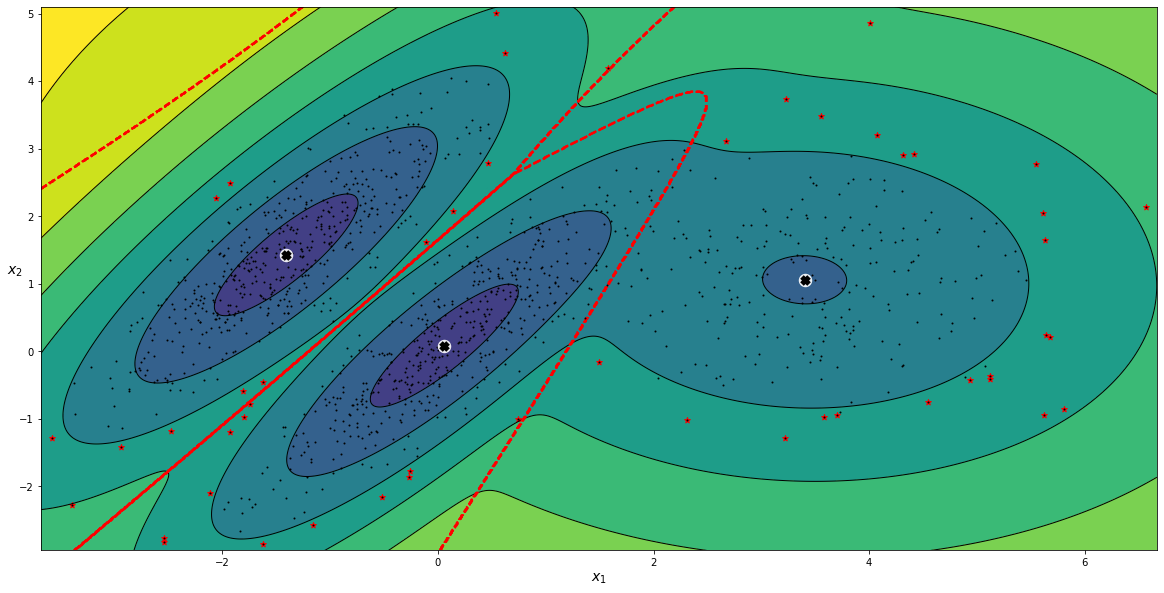

In [86]:
plt.figure(figsize=(20, 10))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [87]:
gm.bic(X)

8189.662685850679

In [88]:
gm.aic(X)

8102.437405735641

## Bayesian Gaussian Mixture Models

In [89]:
from sklearn.mixture import BayesianGaussianMixture

In [90]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [91]:
np.round(bgm.weights_, 2)

array([0.4, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

# Excercise

## Ans.10

In [92]:
from sklearn.datasets import fetch_olivetti_faces

In [93]:
ol_faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/priyam145/scikit_learn_data


In [97]:
ol_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [105]:
images = ol_faces.images
images.shape

(400, 64, 64)

In [118]:
random_indices = np.random.randint(0, 400, size=10)
demo_images = images[np.sort(random_indices), :, :]
demo_images.shape

(10, 64, 64)

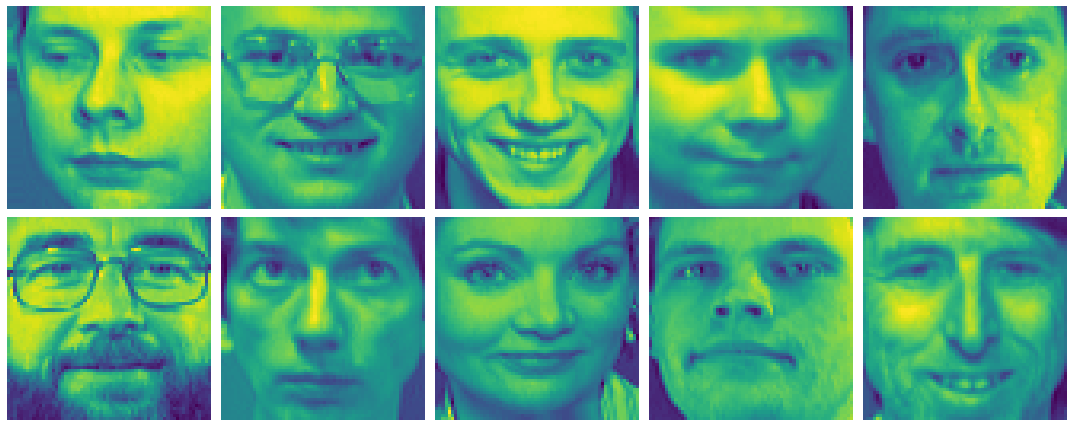

In [145]:
rows = 2 
cols = 5
fig, axs = plt.subplots(figsize=(15, 10), nrows=rows, ncols=cols)
axis = list(zip(np.sort(np.repeat(np.arange(rows), cols)), np.r_[np.arange(cols), np.arange(cols)])) 
axis_face_zip = zip(axis, demo_images[:])
for axis, face in axis_face_zip:
    row = axis[0]
    col = axis[1]
    axs[row, col].imshow(face)
    axs[row, col].axis('off')
plt.tight_layout(h_pad=-17.5);

In [146]:
X = ol_faces.data
y = ol_faces.target

In [147]:
X.shape

(400, 4096)

In [148]:
print(y.shape)
print(np.unique(y))

(400,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

In [156]:
stratified_ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_cv_indices, test_indices in stratified_ss.split(X, y):
    X_train_cv = X[train_cv_indices]
    X_test = X[test_indices]
    y_train_cv = y[train_cv_indices]
    y_test = y[test_indices]

for train_index, cv_index in stratified_ss.split(X_train_cv, y_train_cv):
    X_train = X_train_cv[train_index]
    X_cv = X_train_cv[cv_index]
    y_train = y_train_cv[train_index]
    y_cv = y_train_cv[cv_index]

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [193]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_cv_pca = pca.transform(X_cv)
X_test_pca = pca.transform(X_test)

pca.n_components_

185

In [203]:
lower_k_limit =10
upper_k_limit = 200
step_size = 5
k_range = range(lower_k_limit, upper_k_limit, step_size)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
                for k in k_range]

In [195]:
from sklearn.metrics import silhouette_score

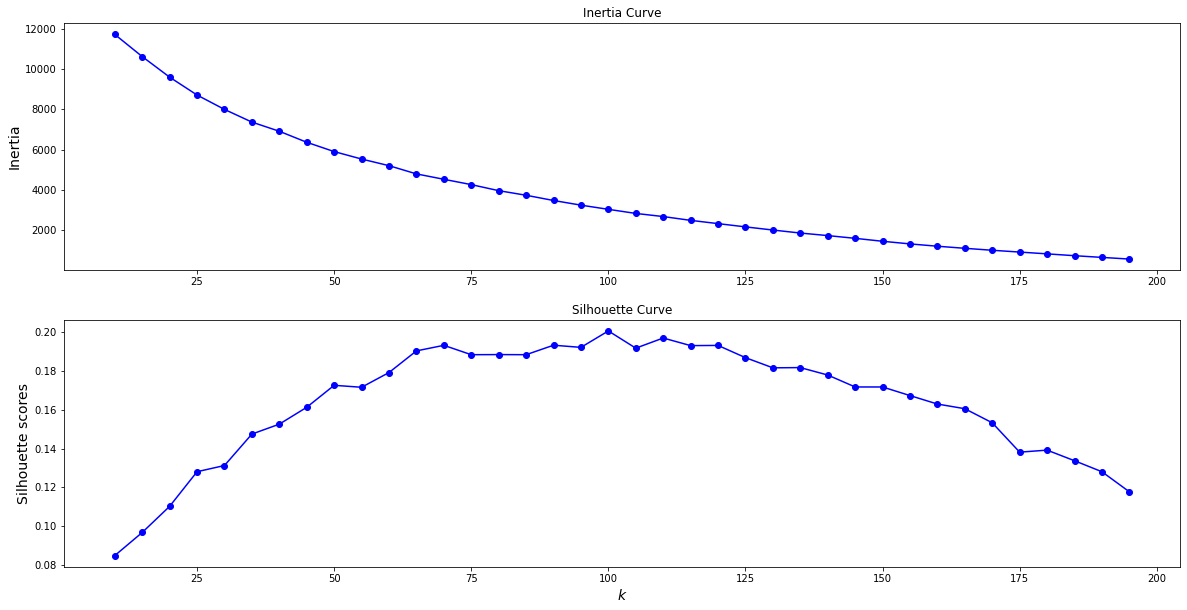

In [204]:
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k]    

fig, axs = plt.subplots(figsize=(20, 10), nrows=2)
axs[0].plot(k_range, inertias, "bo-")
axs[0].set_ylabel("Inertia", fontsize=14)
axs[0].set_title('Inertia Curve')

axs[1].plot(k_range, silhouette_scores, "bo-")
axs[1].set_ylabel("Silhouette scores", fontsize=14)
axs[1].set_title('Silhouette Curve')
plt.xlabel("$k$", fontsize=14);

In [227]:
best_k_index = np.argmax(silhouette_scores)
best_k_index

18

In [233]:
best_kmeans_model = kmeans_per_k[best_k_index]
best_k = step_size * best_k_index + lower_k_limit
best_k

100

Cluster 0


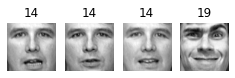

Cluster 1


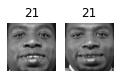

Cluster 2


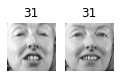

Cluster 3


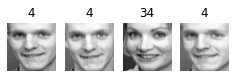

Cluster 4


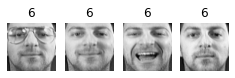

Cluster 5


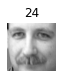

Cluster 6


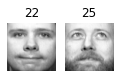

Cluster 7


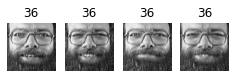

Cluster 8


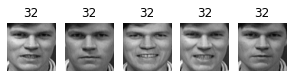

Cluster 9


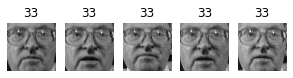

Cluster 10


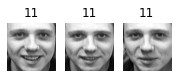

Cluster 11


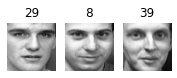

Cluster 12


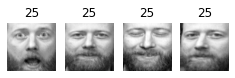

Cluster 13


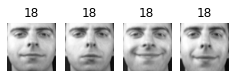

Cluster 14


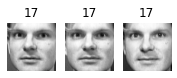

Cluster 15


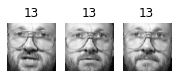

Cluster 16


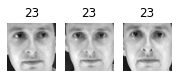

Cluster 17


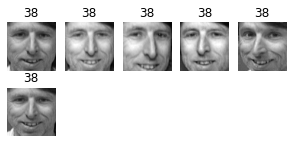

Cluster 18


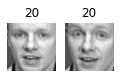

Cluster 19


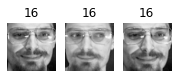

Cluster 20


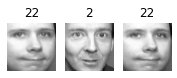

Cluster 21


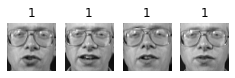

Cluster 22


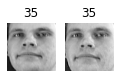

Cluster 23


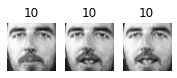

Cluster 24


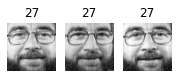

Cluster 25


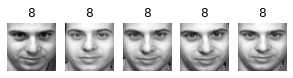

Cluster 26


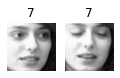

Cluster 27


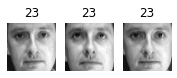

Cluster 28


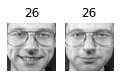

Cluster 29


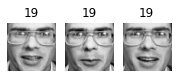

Cluster 30


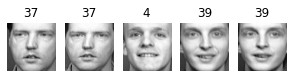

Cluster 31


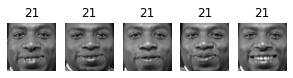

Cluster 32


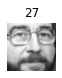

Cluster 33


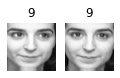

Cluster 34


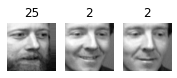

Cluster 35


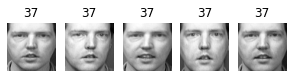

Cluster 36


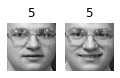

Cluster 37


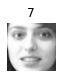

Cluster 38


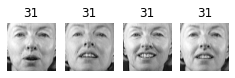

Cluster 39


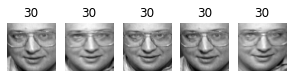

Cluster 40


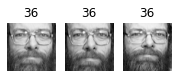

Cluster 41


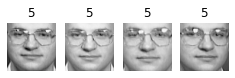

Cluster 42


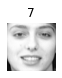

Cluster 43


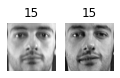

Cluster 44


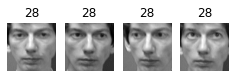

Cluster 45


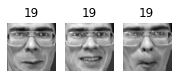

Cluster 46


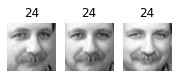

Cluster 47


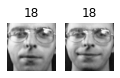

Cluster 48


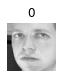

Cluster 49


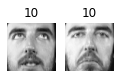

Cluster 50


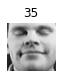

Cluster 51


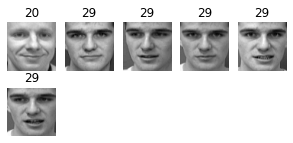

Cluster 52


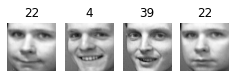

Cluster 53


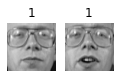

Cluster 54


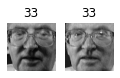

Cluster 55


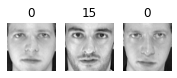

Cluster 56


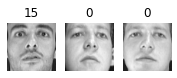

Cluster 57


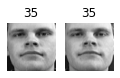

Cluster 58


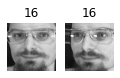

Cluster 59


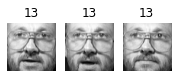

Cluster 60


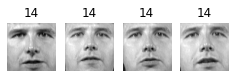

Cluster 61


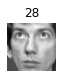

Cluster 62


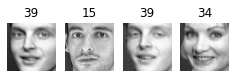

Cluster 63


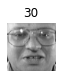

Cluster 64


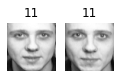

Cluster 65


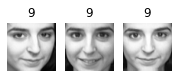

Cluster 66


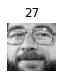

Cluster 67


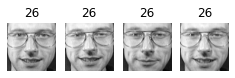

Cluster 68


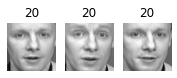

Cluster 69


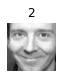

Cluster 70


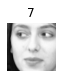

Cluster 71


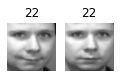

Cluster 72


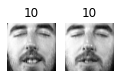

Cluster 73


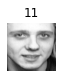

Cluster 74


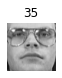

Cluster 75


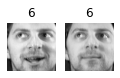

Cluster 76


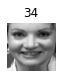

Cluster 77


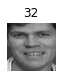

Cluster 78


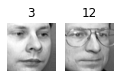

Cluster 79


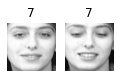

Cluster 80


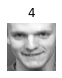

Cluster 81


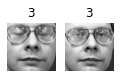

Cluster 82


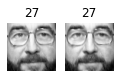

Cluster 83


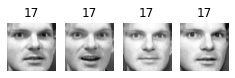

Cluster 84


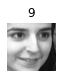

Cluster 85


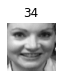

Cluster 86


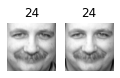

Cluster 87


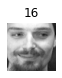

Cluster 88


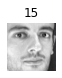

Cluster 89


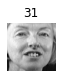

Cluster 90


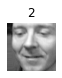

Cluster 91


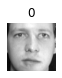

Cluster 92


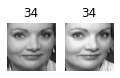

Cluster 93


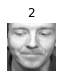

Cluster 94


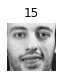

Cluster 95


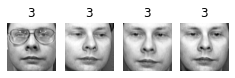

Cluster 96


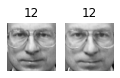

Cluster 97


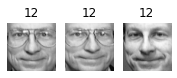

Cluster 98


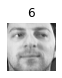

Cluster 99


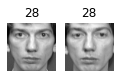

In [235]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_kmeans_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_kmeans_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Ans.11

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

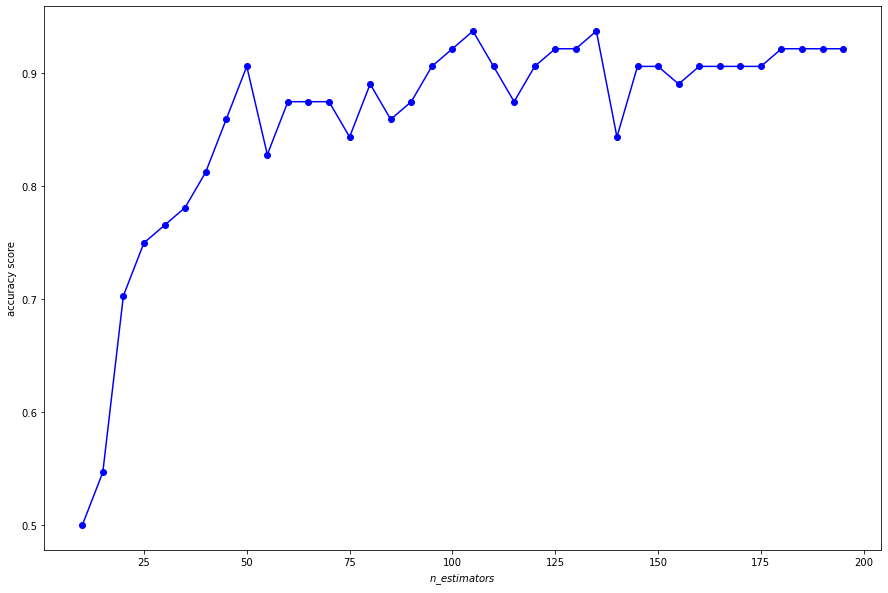

In [268]:
lower_estimator_limit = 10
upper_estimator_limit = 200
step_size = 5
estimators_range = range(lower_estimator_limit, upper_estimator_limit, step_size)
accuracy_array = np.zeros(len(estimators_range))

rand_clf_models = [RandomForestClassifier(n_estimators=estimators).fit(X_train_pca, y_train)
                    for index, estimators in enumerate(estimators_range)]

accuracy_array = np.array([accuracy_score(y_cv, model.predict(X_cv_pca)) for model in rand_clf_models])

plt.figure(figsize=(15, 10))
plt.plot(estimators_range, accuracy_array, 'bo-')
plt.xlabel('$n$_$estimators$')
plt.ylabel('accuracy score');

In [269]:
best_estimator_index = np.argmax(accuracy_array)
best_estimator_index

19

In [270]:
best_n_estimators = step_size * best_estimator_index + lower_estimator_limit
best_n_estimators

105

In [271]:
best_rf_model = rand_clf_models[best_estimator_index]
best_accuracy_score = accuracy_array[best_estimator_index]
best_accuracy_score

0.9375

In [272]:
transformed_X_train = best_kmeans_model.transform(X_train_pca)
transformed_X_cv = best_kmeans_model.transform(X_cv_pca)
transformed_X_test = best_kmeans_model.transform(X_test_pca)
transformed_X.shape

(256, 100)

In [273]:
best_rf_model.fit(transformed_X_train, y_train)

RandomForestClassifier(n_estimators=105)

In [274]:
cv_predictions = best_rf_model.predict(transformed_X_cv)
accuracy_score(y_cv, cv_predictions)

0.703125

In [260]:
from sklearn.pipeline import Pipeline

In [276]:
lower_k_limit = 10
upper_k_limit = 200
step_size = 5
k_range = range(lower_k_limit, upper_k_limit, step_size)

for k in k_range:
    pipeline = Pipeline([
        ('kmeans', KMeans(n_clusters=k, random_state=42)),
        ('rand_clf', best_rf_model),
    ])
    pipeline.fit(X_train_pca, y_train)
    print('k:', k, '-->', pipeline.score(X_cv_pca, y_cv))

k: 10 --> 0.453125
k: 15 --> 0.484375
k: 20 --> 0.59375
k: 25 --> 0.609375
k: 30 --> 0.65625
k: 35 --> 0.671875
k: 40 --> 0.640625
k: 45 --> 0.703125
k: 50 --> 0.703125
k: 55 --> 0.734375
k: 60 --> 0.765625
k: 65 --> 0.703125
k: 70 --> 0.71875
k: 75 --> 0.765625
k: 80 --> 0.703125
k: 85 --> 0.765625
k: 90 --> 0.734375
k: 95 --> 0.734375
k: 100 --> 0.734375
k: 105 --> 0.734375
k: 110 --> 0.75
k: 115 --> 0.71875
k: 120 --> 0.75
k: 125 --> 0.71875
k: 130 --> 0.703125
k: 135 --> 0.734375
k: 140 --> 0.734375
k: 145 --> 0.75
k: 150 --> 0.734375
k: 155 --> 0.734375
k: 160 --> 0.734375
k: 165 --> 0.71875
k: 170 --> 0.71875
k: 175 --> 0.75
k: 180 --> 0.734375
k: 185 --> 0.734375
k: 190 --> 0.765625
k: 195 --> 0.71875


#### Badddddd, none of the models were able to cross 80%

In [277]:
X_train_extended = np.c_[X_train_pca, transformed_X_train]
X_cv_extended = np.c_[X_cv_pca, transformed_X_cv]
X_test_extended = np.c_[X_test_pca, transformed_X_test]

In [278]:
best_rf_model.fit(X_train_extended, y_train)
best_rf_model.score(X_cv_extended, y_cv)

0.78125

#### Better than previous but not acceptable

## Ans.12

In [283]:
from sklearn.mixture import BayesianGaussianMixture

In [282]:
pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
X_cv_reduced = pca.transform(X_cv)
X_test_reduced = pca.transform(X_test)

pca.n_components_

185

In [293]:
bgm_model = BayesianGaussianMixture(n_components=best_k + 10)

In [320]:
y_pred = bgm_model.fit_predict(X_train_reduced)

In [321]:
bgm_model.weights_[np.round(bgm_model.weights_, 2) == 0].shape

(29,)

We can see that BayesianGaussianMixture automatically removed some gaussian distributions as there weights are = 0

In [330]:
sample_size = 20
samples = bgm_model.sample(sample_size)
X_samples = samples[0]
y_samples = samples[1]

In [331]:
sample_faces_ravelled = pca.inverse_transform(X_samples)
sample_faces_ravelled.shape

(20, 4096)

In [332]:
sample_faces = sample_faces_ravelled.reshape(sample_size, 64, 64)

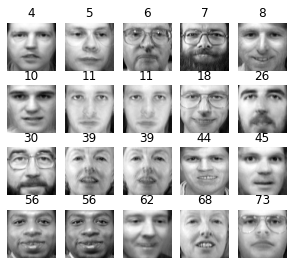

In [333]:
plot_faces(sample_faces, y_samples)

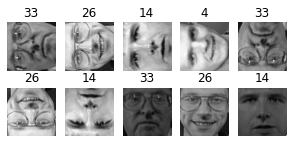

In [341]:
n_rotated_img = 4
rotated_sample_faces = np.transpose(X_train[:n_rotated_img].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated_sample_faces = rotated_sample_faces.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated_img]


n_flipped_img = 3
flipped_sample_faces = X_train[:n_flipped_img].reshape(-1, 64, 64)[:, ::-1]
flipped_sample_faces = flipped_sample_faces.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped_img]


n_darkened_img = 3
darkened_sample_faces = X_train[:n_darkened_img].copy()
darkened_sample_faces[:, 1:-1] *= 0.3
darkened_sample_faces = darkened_sample_faces.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened_img]

X_bad_faces = np.r_[rotated_sample_faces, flipped_sample_faces, darkened_sample_faces]
y_bad_faces = np.r_[y_rotated, y_flipped, y_darkened]

plot_faces(X_bad_faces, y_bad_faces)

In [343]:
bgm_model.score_samples(X_train_reduced[:n_rotated_img])

array([339.56153242, 339.14705867, 339.41398022, 339.59367801])

In [344]:
X_bad_faces_reduced = pca.transform(X_bad_faces)
bgm_model.score_samples(X_bad_faces_reduced)

array([-22433.57330424, -33647.02339015, -35729.25570948, -32564.65897224,
       -32575.8509973 , -43335.08275805, -44762.13669294,  -9926.61299532,
       -10683.5539202 ,  -9608.47827697])

#### We can see the sample scores of bad faces are negative, which means the model was able to flag them as anomalies

## Ans.13

In [345]:
pca = PCA(n_components=0.99)
new_X_train_reduced = pca.fit_transform(X_train)
new_X_test_reduced = pca.transform(X_test)
new_X_cv_reduced = pca.transform(X_cv)

In [362]:
for i in range(4):
    real_image = X_train[i, :]
    reduced_image = new_X_train_reduced[i, :]
    reconst_image = pca.inverse_transform(reduced_image)
    reconstruction_error = ((real_image - reconst_image)**2).mean()
    print(reconstruction_error)

0.00036345157
5.5831984e-05
0.00022405827
0.0002724571


In [363]:
for i in range(4):
    real_image = X_train[i, :]
    reduced_image = X_bad_faces_reduced[i, :]
    reconst_image = pca.inverse_transform(reduced_image)
    reconstruction_error = ((real_image - reconst_image)**2).mean()
    print(reconstruction_error)

0.014626283
0.02726929
0.025138846
0.049848467


#### We can clearly see that reconstruction error for bad faces is a lot higher than original